In [1]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Now we need to read in the data
df = pd.read_csv(r"C:\Users\odnal\Downloads\movies.csv")

In [2]:
# Now let's take a look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# Check for duplicates

df[df.duplicated()]  # There are no duplicates

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


In [4]:
df.duplicated().sum()  # 0 Duplicates found.

0

In [5]:
for col in df.columns:
    pct_missing = round(np.mean(df[col].isnull()*100))
    print('{} - {}%'.format(col,(pct_missing)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [6]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [7]:
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

# Data_Cleaning

In [8]:
# df['DataFrame Column'] = df['DataFrame Column'].fillna(0)
df['budget'] = df['budget'].replace(np.nan, 0)
df['gross'] = df['gross'].replace(np.nan, 0)
df['runtime'] = df['runtime'].replace(np.nan, 0)
df['score'] = df['score'].replace(np.nan, 0)
df['votes'] = df['votes'].replace(np.nan, 0)
df['rating'] = df['rating'].replace(np.nan, 'Unknown')
df['released'] = df['released'].replace(np.nan, 'Unknown')
df['writer'] = df['writer'].replace(np.nan, 'Unknown')
df['star'] = df['star'].replace(np.nan, 'Unknown')
df['country'] = df['country'].replace(np.nan, 'Unknown')
df['company'] = df['company'].replace(np.nan, 'Unknown')

In [9]:
# Removing the missing data

df.dropna(inplace = True)
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,Unknown,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,0.0,Unknown,90.0
7664,Dream Round,Unknown,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0.0,0.0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,Unknown,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,0.0,Embi Productions,0.0
7666,It's Just Us,Unknown,Drama,2020,"October 1, 2020 (United States)",0.0,0.0,James Randall,James Randall,Christina Roz,United States,15000.0,0.0,Unknown,120.0


In [10]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [11]:
df.isna().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [12]:
# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


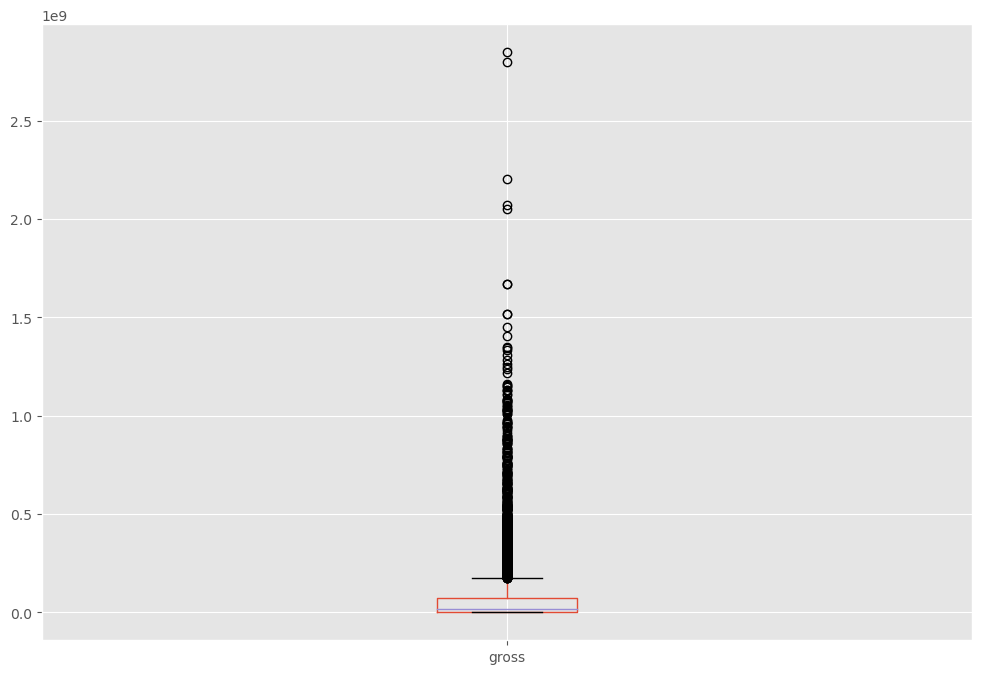

In [13]:
# Are there any Outliers?

df.boxplot(column=['gross'])
plt.show()

In [14]:
df.head(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0


In [15]:
# Change datatype of columns

df['votes'] = df['votes'].astype('int64')
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [16]:
df.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124


In [17]:
# The year is not correct corresponding to released so create the correct released year

def handle_releasedyear(year):
    year = str(year)
    if ', ' in year:
        year = year.split(', ')[1][0:5]
        return year
    else:
        return year
df['released_year'] = df['released'].apply(handle_releasedyear)
df['released_year']

0       1980 
1       1980 
2       1980 
3       1980 
4       1980 
        ...  
7663    2020 
7664    2020 
7665    2020 
7666    2020 
7667    2020 
Name: released_year, Length: 7668, dtype: object

In [18]:
def handle_releasedmonth(month):
    month = str(month)
    if ', ' in month:
        month = month.split(', ')[0].split()[0]
        return month
    else:
        return month
df['released_month'] = df['released'].apply(handle_releasedmonth)
df['released_month']

0           June
1           July
2           June
3           July
4           July
          ...   
7663     October
7664    February
7665       April
7666     October
7667      August
Name: released_month, Length: 7668, dtype: object

In [19]:
def handle_releaseddate(date):
    date = str(date)
    if ', ' in date:
        date = date.split(', ')[0].split()[1]
        return date
    else:
        return date
df['released_date'] = df['released'].apply(handle_releaseddate)
df['released_date']

0       13
1        2
2       20
3        2
4       25
        ..
7663    23
7664     7
7665    27
7666     1
7667    19
Name: released_date, Length: 7668, dtype: object

In [20]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year,released_month,released_date
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980,June,13
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980,July,2
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980,June,20
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980,July,2
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980,July,25


In [21]:
df.sort_values(by = ['gross'],ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year,released_month,released_date
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009,December,18
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019,April,26
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997,December,19
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015,December,18
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018,April,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92,1990,January,26
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85,1989,April,14
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89,1989,April,7
1601,My Twentieth Century,Unknown,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104,1990,January,13


In [22]:
# To display all rows by changing the default option for the rest  of the Notebook
pd.set_option('display.max_rows',None)

In [53]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [24]:
# Reset to Normal
pd.reset_option('^display.', silent=True)

In [25]:
df.sort_values(by = ['gross'],ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year,released_month,released_date
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009,December,18
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019,April,26
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997,December,19
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015,December,18
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018,April,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92,1990,January,26
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85,1989,April,14
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89,1989,April,7
1601,My Twentieth Century,Unknown,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104,1990,January,13


In [26]:
# Check if there are any duplicates
print(df[df.duplicated()])
print()
print(df.duplicated().sum())

# No duplicates

Empty DataFrame
Columns: [name, rating, genre, year, released, score, votes, director, writer, star, country, budget, gross, company, runtime, released_year, released_month, released_date]
Index: []

0


In [27]:
# To drop duplicates if there is any(drop rows)
df.drop_duplicates(inplace = True)

# Finding Correlations in the data

In [28]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year,released_month,released_date
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980,June,13
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980,July,2
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980,June,20
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980,July,2
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980,July,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,Unknown,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,Unknown,90,2020,October,23
7664,Dream Round,Unknown,Comedy,2020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90,2020,February,7
7665,Saving Mbango,Unknown,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0,2020,April,27
7666,It's Just Us,Unknown,Drama,2020,"October 1, 2020 (United States)",0.0,0,James Randall,James Randall,Christina Roz,United States,15000,0,Unknown,120,2020,October,1


In [29]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

In [30]:
df.groupby(['company', 'year'])[["gross"]].sum()

,,gross
company,year,
"""DIA"" Productions GmbH & Co. KG",2003,44350926
"""Weathering With You"" Film Partners",2019,193457467
.406 Production,1996,10580
1+2 Seisaku Iinkai,2000,1196218
10 West Studios,2010,814906
...,...,...
i am OTHER,2015,17986781
i5 Films,2001,10031529
iDeal Partners Film Fund,2013,506303


In [31]:
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2010    3300479986
                       2011    3223799224
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2006    2934631933
                       2019    2932757449
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
Columbia Pictures      2011    2738363306
Name: gross, dtype: int64

In [32]:
CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

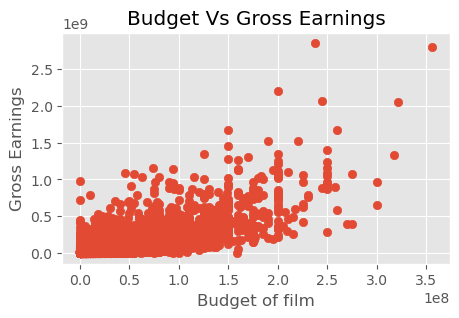

In [33]:
# Scatter plot to compare Budget Vs Gross

plt.figure(figsize = (5,3))
plt.scatter(x = df['budget'],y = df['gross'])
plt.title('Budget Vs Gross Earnings')
plt.xlabel('Budget of film')
plt.ylabel('Gross Earnings')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

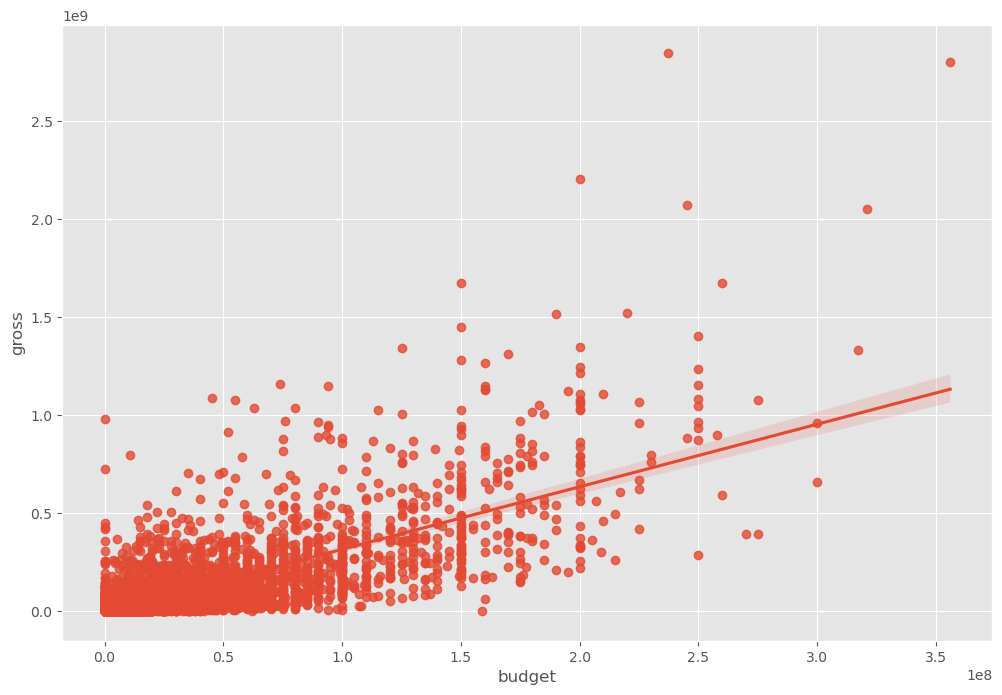

In [34]:
# Plot Budget Vs Gross using Seaborn Library

sns.regplot(x = 'budget',y = 'gross',data = df)

<AxesSubplot:xlabel='budget', ylabel='gross'>

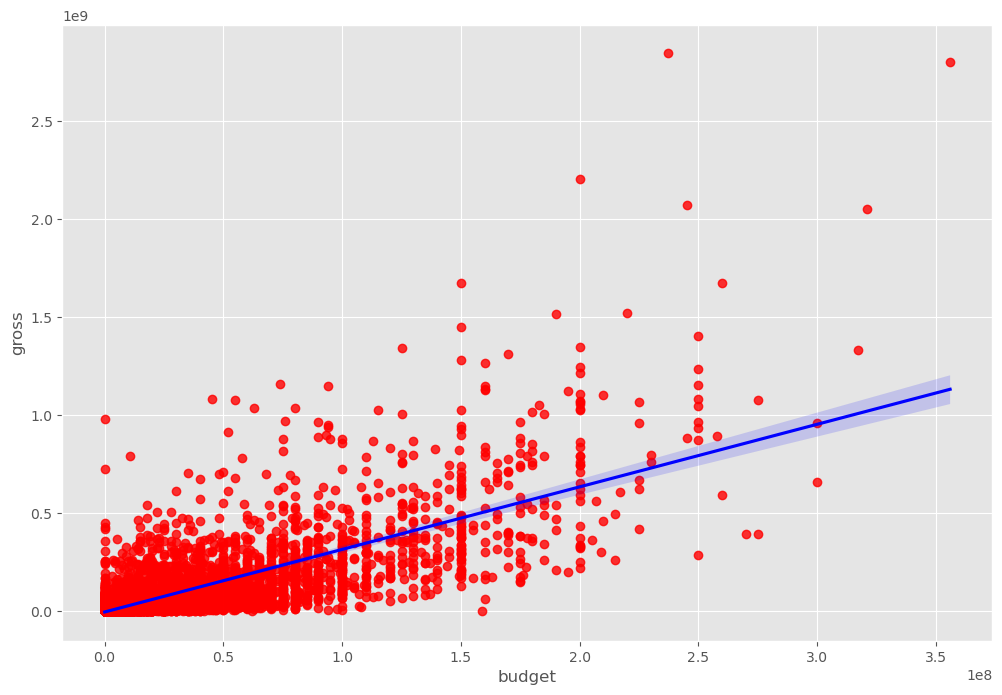

In [35]:
# Plot Budget Vs Gross using Seaborn Library

sns.regplot(x = 'budget',y = 'gross',data = df,scatter_kws = {'color' : 'red'},line_kws = {'color':'blue'})

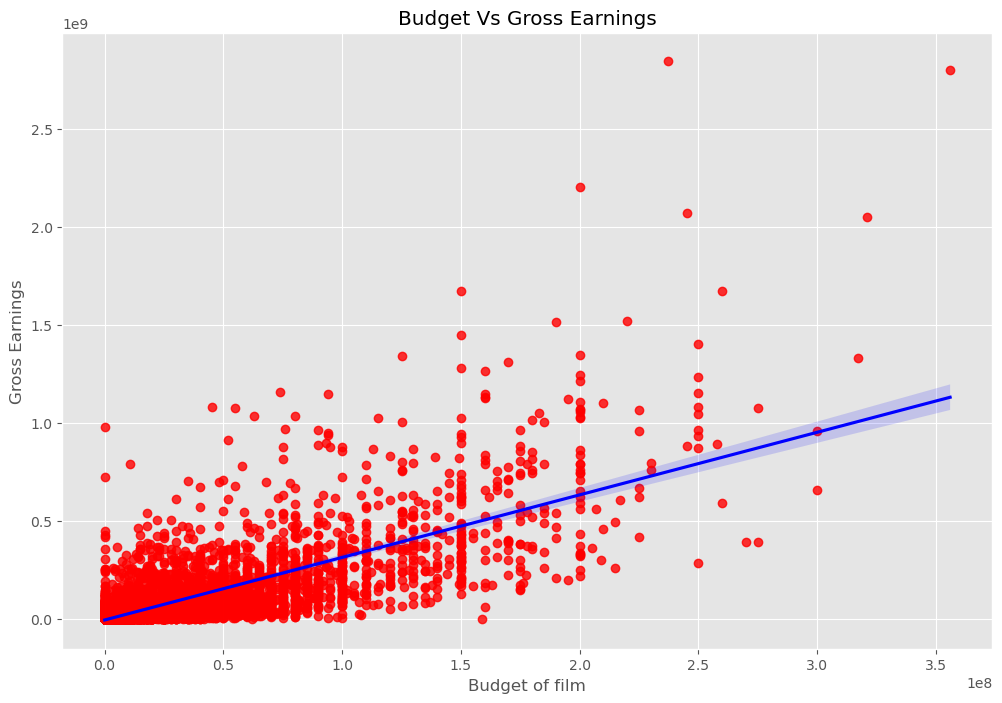

In [36]:
# Plot Budget Vs Gross using Seaborn Library

sns.regplot(x = 'budget',y = 'gross',data = df,scatter_kws = {'color' : 'red'},line_kws = {'color':'blue'})
plt.title('Budget Vs Gross Earnings')
plt.xlabel('Budget of film')
plt.ylabel('Gross Earnings')
plt.show()

<AxesSubplot:xlabel='gross', ylabel='budget'>

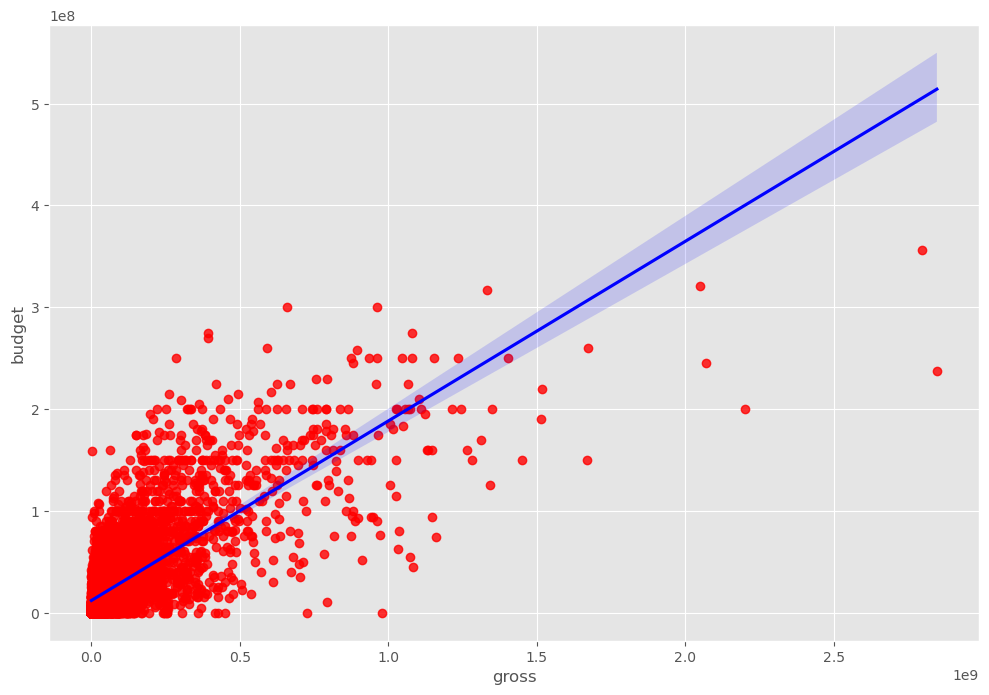

In [37]:
# Plot Budget Vs Gross using Seaborn Library

sns.regplot(y = 'budget',x = 'gross',data = df,scatter_kws = {'color' : 'red'},line_kws = {'color':'blue'})

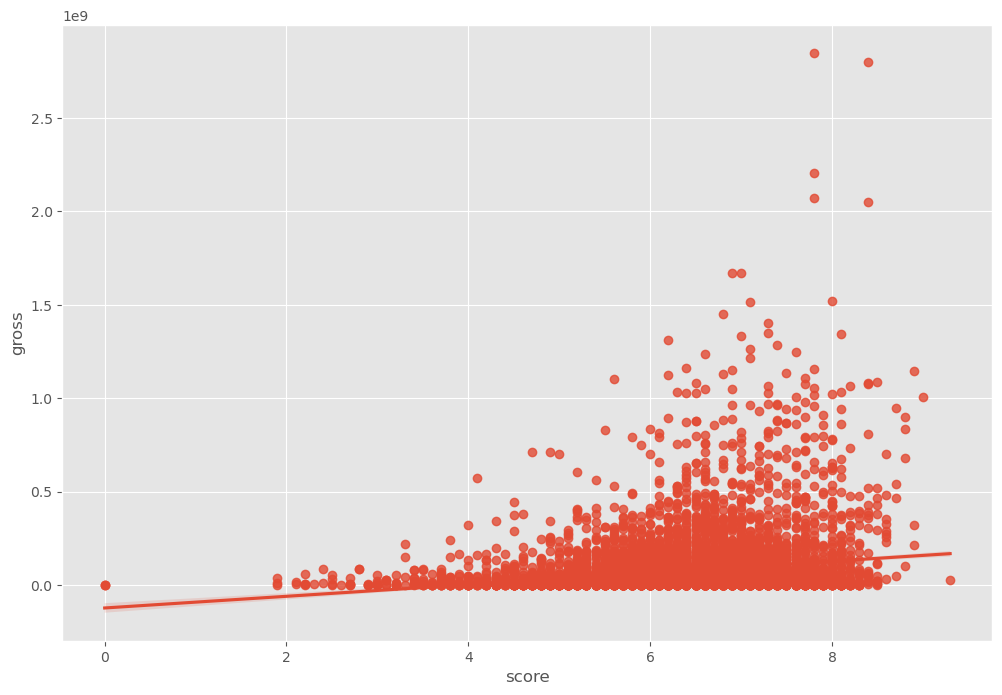

In [38]:
sns.regplot(x="score", y="gross", data=df)
plt.show()

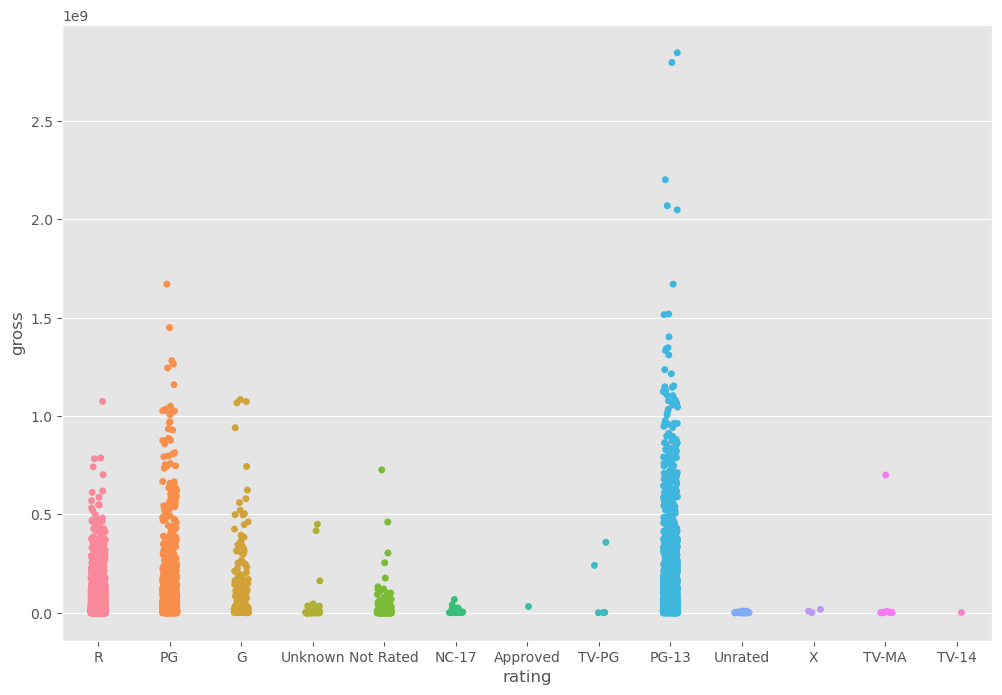

In [39]:
# sns.swarmplot(x="rating", y="gross", data=df)
# plt.show()
sns.stripplot(x="rating", y="gross", data=df)
plt.show()

In [40]:
# Let's start looking at correlation

df.corr()  # method : {'pearson', 'kendall', 'spearman'},By default method = 'pearson'

,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000


In [41]:
df.corr(method ='kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.066796,0.330410,0.209304,0.216595,0.096390
score,0.066796,1.000000,0.300673,-0.004843,0.091331,0.283601
votes,0.330410,0.300673,1.000000,0.439883,0.560449,0.197697
budget,0.209304,-0.004843,0.439883,1.000000,0.541956,0.176184
gross,0.216595,0.091331,0.560449,0.541956,1.000000,0.177429
runtime,0.096390,0.283601,0.197697,0.176184,0.177429,1.000000


In [42]:
df.corr(method ='spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097757,0.468107,0.291152,0.314681,0.141805
score,0.097757,1.000000,0.428810,-0.007002,0.133564,0.399868
votes,0.468107,0.428810,1.000000,0.604693,0.752550,0.289359
budget,0.291152,-0.007002,0.604693,1.000000,0.716816,0.246941
gross,0.314681,0.133564,0.752550,0.716816,1.000000,0.257478
runtime,0.141805,0.399868,0.289359,0.246941,0.257478,1.000000


In [43]:
# High correlation between Budget and Gross followed by votes and Gross

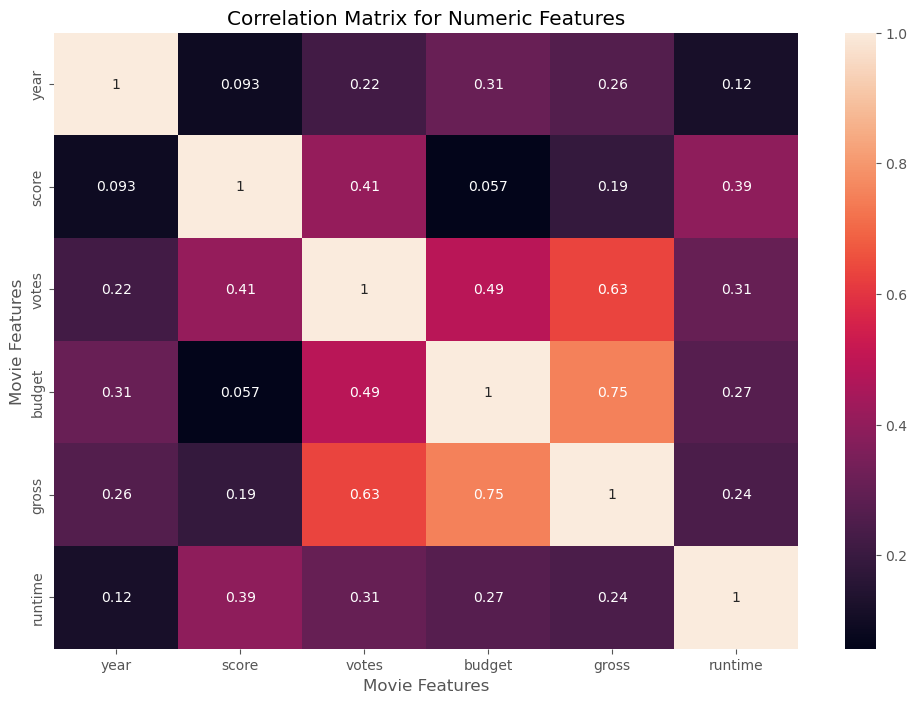

In [44]:
sns.heatmap(df.corr(),annot = True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [45]:
# Convert string datatype columns into category again to category codes
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object' or 'category'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized.sort_values('gross',ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year,released_month,released_date
5445,533,5,0,29,696,59,927,1155,1778,2334,55,403,7472,2253,95,37,18,9
7445,535,5,0,39,183,65,911,162,743,2241,55,413,7471,1606,113,48,10,28
3045,6896,5,6,17,704,59,927,1155,1778,1595,55,393,7470,2253,124,25,18,10
6663,5144,5,0,35,698,59,905,1125,2550,524,55,404,7469,1540,71,44,18,9
7244,536,5,0,38,192,65,910,162,743,2241,55,412,7468,1606,82,47,10,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,3712,6,5,9,1277,26,54,117,82,2798,55,0,0,1159,25,15,24,28
1614,1745,6,10,9,55,33,252,1033,1743,166,54,0,0,146,18,14,10,5
1606,2691,6,8,9,257,41,268,2743,946,1195,6,0,0,2237,22,14,10,38
1601,3836,10,4,9,1160,52,254,1105,1696,681,18,0,0,504,37,15,24,4


In [46]:
# Now we need to read in the data
df = pd.read_csv(r"C:\Users\odnal\Downloads\movies.csv")

df.sort_values('gross',ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


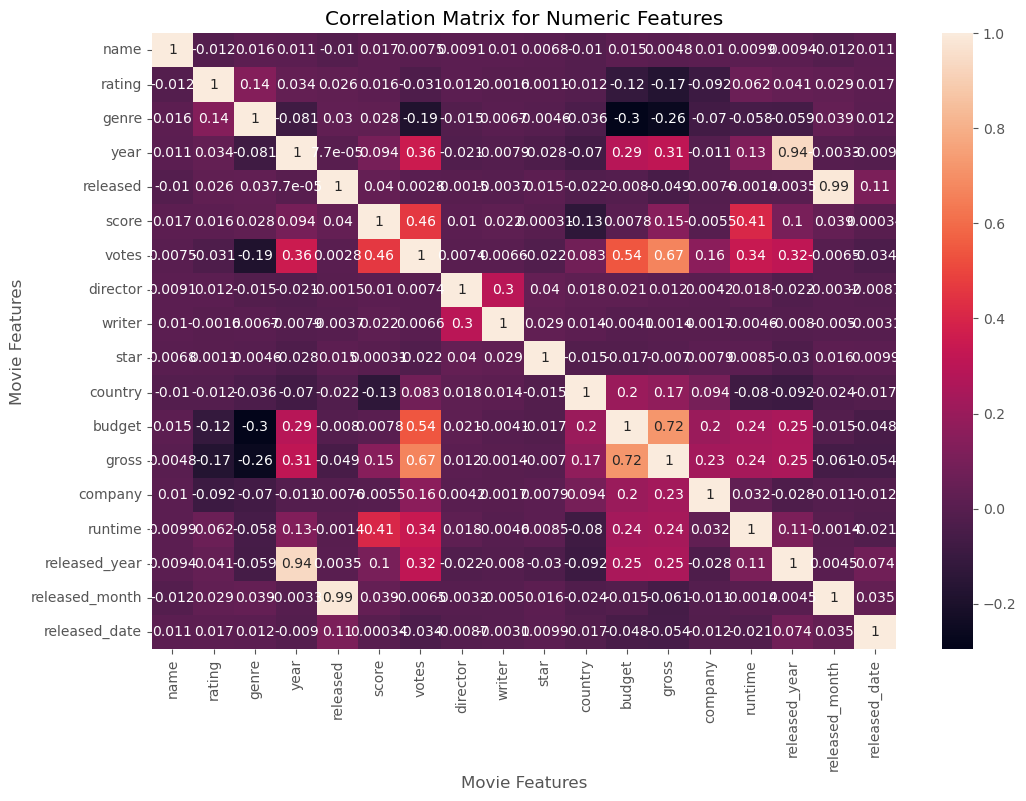

In [47]:
# Heatmap for df_numerized

sns.heatmap(df_numerized.corr(),annot = True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [48]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year,released_month,released_date
name,1.000000,-0.012206,0.016355,0.011453,-0.010480,0.016598,0.007497,0.009079,0.009985,0.006844,-0.010359,0.015249,0.004800,0.010373,0.009920,0.009395,-0.011740,0.011213
rating,-0.012206,1.000000,0.136127,0.033801,0.025526,0.015999,-0.031415,0.011951,-0.001610,0.001063,-0.011793,-0.115811,-0.169984,-0.092284,0.061764,0.041083,0.028859,0.017144
genre,0.016355,0.136127,1.000000,-0.081261,0.030429,0.027592,-0.185332,-0.015258,0.006747,-0.004641,-0.035783,-0.295846,-0.260990,-0.070032,-0.057637,-0.059349,0.039476,0.011539
year,0.011453,0.033801,-0.081261,1.000000,0.000077,0.094416,0.355072,-0.020795,-0.007930,-0.027912,-0.069590,0.288039,0.313549,-0.011425,0.125994,0.936832,-0.003332,-0.009014
released,-0.010480,0.025526,0.030429,0.000077,1.000000,0.040064,0.002845,-0.001526,-0.003707,0.015474,-0.021707,-0.008019,-0.048951,-0.007634,-0.001369,0.003543,0.988981,0.109281
score,0.016598,0.015999,0.027592,0.094416,0.040064,1.000000,0.458517,0.010307,0.021692,0.000310,-0.134743,0.007773,0.148174,-0.005548,0.406004,0.102022,0.038778,0.000344
votes,0.007497,-0.031415,-0.185332,0.355072,0.002845,0.458517,1.000000,0.007427,0.006558,-0.022047,0.082994,0.539383,0.670375,0.157516,0.337200,0.315709,-0.006468,-0.033855
director,0.009079,0.011951,-0.015258,-0.020795,-0.001526,0.010307,0.007427,1.000000,0.299523,0.039875,0.018014,0.021450,0.011996,0.004248,0.018408,-0.021644,-0.003172,-0.008703
writer,0.009985,-0.001610,0.006747,-0.007930,-0.003707,0.021692,0.006558,0.299523,1.000000,0.028887,0.014490,-0.004073,0.001422,0.001729,-0.004598,-0.008039,-0.004973,-0.003116
star,0.006844,0.001063,-0.004641,-0.027912,0.015474,0.000310,-0.022047,0.039875,0.028887,1.000000,-0.015101,-0.017273,-0.007012,0.007918,0.008507,-0.030142,0.015790,0.009898


In [49]:
corr_pairs = df_numerized.corr().unstack()
corr_pairs

name           name              1.000000
               rating           -0.012206
               genre             0.016355
               year              0.011453
               released         -0.010480
                                   ...   
released_date  company          -0.012388
               runtime          -0.020897
               released_year     0.074197
               released_month    0.035407
               released_date     1.000000
Length: 324, dtype: float64

In [50]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre          budget          -0.295846
budget         genre           -0.295846
genre          gross           -0.260990
gross          genre           -0.260990
votes          genre           -0.185332
                                  ...   
gross          gross            1.000000
company        company          1.000000
runtime        runtime          1.000000
writer         writer           1.000000
released_date  released_date    1.000000
Length: 324, dtype: float64

In [51]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes           budget            0.539383
budget          votes             0.539383
votes           gross             0.670375
gross           votes             0.670375
budget          gross             0.716984
gross           budget            0.716984
year            released_year     0.936832
released_year   year              0.936832
released_month  released          0.988981
released        released_month    0.988981
name            name              1.000000
released_year   released_year     1.000000
rating          rating            1.000000
genre           genre             1.000000
year            year              1.000000
released        released          1.000000
score           score             1.000000
votes           votes             1.000000
released_month  released_month    1.000000
director        director          1.000000
star            star              1.000000
country         country           1.000000
budget          budget            1.000000
gross      

In [52]:
# Budget followed by Votes have the highest correlation to the Gross earnings
# Gross has lowest correlation of  with writer of 0.001422
# Gross has more negative correlation with Genre of -0.260990